<a href="https://colab.research.google.com/github/juliosaopedro/Meus_Projetos/blob/master/Avaliacao_Risco_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Projeto Avaliação de Risco de Crédito<h1>

Análise de crédito e risco é uma solução financeira que procura investigar a capacidade de uma pessoa ou empresa de pagar pela compra de um produto ou pela prestação de algum serviço. E mesmo que a pessoa ou empresa analisada se mostre com condições de saldar a dívida que quer contrair, a avaliação do risco verifica se o histórico do comportamento dela no mercado é bom.

Quer dizer, é um trabalho complexo e completo para evitar a inadimplência. Quando bem realizado, é capaz de evitar que uma prestadora de serviços ou fornecedora de produtos tenha problemas de caixa com o desfalque dado por algum cliente por não pagamento.

Do ponto de vista da relação entre pessoas jurídicas, a solução é indispensável para garantir que o potencial cliente esteja em sintonia com as práticas da empresa com quem ele vai negociar. É com base nessa perspectiva, de uma relação empresa-empresa, que vamos esclarecer este termo para você neste artigo.


<p align=center>
  <img src="https://github.com/juliosaopedro/Meus_Projetos/blob/master/imagens/Analise_Credito.jpg?raw=true" height="300px">
</p>

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>

Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

<h2> Nossas Análises </h2>

### Importando nossos dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [0]:
# Importar os pacotes necessários

# pandas para manipulação dos dados
import pandas as pd

# matplotlib para nossos gráficos
import matplotlib.pyplot as plt

# seaborn para uma melhor visualização dos gráficos
import seaborn as sns

# numpy para manipulações matemáticas 
import numpy as np

In [0]:
# Definir o estilo do seaborn para os plots
sns.set_style()

In [0]:
# Filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Importando os dados
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

## Análise Exploratória dos dados

A primeira coisa que faremos após importar o *dataset* será examinar as dimensões do *DataFrame* e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso *dataset* é composto por 45 mil entradas e 43 colunas.

In [5]:
# Dimensões do df
print("Dimensões do DataFrame:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Dimensões do DataFrame:
Linhas:		45000
Colunas:	43


Agora já podemos visualizar os nossos dados. Vamos ver as primeiras linhas

In [6]:
# Visualizando as primeiras linhas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


## Dicionário de dados

`ids` - id do cliente <br>
`target_default` - variável que indica se o cliente entrou em `default`ou não<br>
`score_1` - score de classíficação do cliente<br>
`score_2` - score de classificação do cliente<br>
`score_3` - score de classificação do cliente<br>
`score_4` - score de classificação do cliente<br>
`score_5` - score de classificação do cliente<br>
`score_6` - score de classificação do cliente<br>
`risk_rate` - taxa de risco<br>
`last_amount_borrowed` - último valor emprestado<br>
`last_borrowed_in_months` - quantidade de meses desde o último empréstimo<br>
`credit_limit` - limite de crédito<br>
`reason` - Razão<br>
`income` - Renda <br>
`facebook_profile` - possui facebook ou não<br>
`state` - Estado<br>
`zip` - CEP<br>
`channel` - canal de contato<br>
`job_name` - Profissão<br>
`real_state` - valor criptografado <br>
`ok_since` - OK desde <br>
`n_bankruptcies` - Quebra de contrato<br>
`n_defaulted_loans` - Empréstimos inadimplentes<br>
`n_accounts` - Quantidade de contas<br>
`n_issues` - Quantidade de emissões<br>
`application_time_applied` - Tempo de aplicação aplicado (tradução literal)<br>
`application_time_in_funnel` - Tempo de aplicação no funil (tradução literal)<br>
`email` - Provedor de E-mail<br>
`external_data_provider_credit_checks_last_2_year` - Verificações de crédito nos últimos 2 anos<br>
`external_data_provider_credit_checks_last_month` - Verificações de crédito no último mes<br>
`external_data_provider_credit_checks_last_year` - Verificações de crédito no último ano<br>
`external_data_provider_email_seen_before` - email do provedor de dados externo visto antes (tradução literal)<br>
`external_data_provider_first_name` - Primeiro nome no provedor<br>
`external_data_provider_fraud_score` - pontuação de fraude do provedor de dados externo (tradução literal)<br>
`lat_lon` - Latitude e Longitude de localização<br>
`marketing_channel` - Canal de contato<br>
`profile_phone_number` - Número de telefone<br>
`reported_income` - Salário informado<br>
`shipping_state` - Estado de compra<br>
`shipping_zip_code` - CEP da compra<br>
`profile_tags` - Tags<br>
`user_agent` - Navegador utilizado<br>
`target_fraud` - variável `target`para indicação de fraude<br>

Algumas conclusões iniciais que podem ser destacadas a respeito desse análise inicial:

* Existe uma coluna `ids`, anônima, que representa um identificador único do cliente. Iremos eliminar esta coluna mais para frente, pois ela não contém nenhuma informação relevante.
* A variável alvo para analisar o risco de *default* (inadimplência) está na coluna `target_default`.
* As colunas `['score_3', 'score_4', 'score_5']` são numéricas e as colunas `['score_1', 'score_2']` estão codificadas de alguma maneira. Teremos que verificar posteriormente se existe uma quantidade de classes que possa ser convertida em informação útil.
* existem outras variáveis que apresentam algum tipo de codificação, como `['reason', 'state', 'zip', 'channel', 'job_name', 'real_state']` que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.
* A coluna `profile_tags` contém um dicionário com *tags* atribuídas a cada cliente, aparentemente.
* A coluna `target_fraud` seria a variável alvo de outro modelo para este mesmo *dataset*, onde o objetivo seria a detecção de fraude.
* A coluna `lat_lon` está em formato *string* contendo uma tupla com as coordenadas.

In [7]:
# ver resumo estatístico do dados numéricos
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Olhando o resumo das principais informações estatísticas somos capazes de destacar algumas observações:

* A coluna `external_data_provider_credit_checks_last_2_year` possui valores mínimos, máximos e desvio-padrão iguais a zero.
* A coluna `reported_income` apresenta valores *inf*, que irão interferir na análise e modelo. Substituiremos valores do tipo `np.inf` por `np.nan` para trabalhar com os dados.
* A coluna `external_data_provider_email_seen_before` apresenta o valor mínimo de -999, o que é estranho ao se considerar as outras informações. Após verificar de maneira mais aprofundada, chegou-se a conclusão que esse dados são *outliers* ou foram tratados inadequadamente. Substituiremos os valores iguais a -999 por `np.nan`.

Vamos realizar o levantamento dos tipos de variáveis que compõem o *DataFrame* a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

Vamos verificar os tipos de nossas variáveis

In [8]:
# tipo das variáveis
print("\nTipos das Variáveis:")
print(df.dtypes)


Tipos das Variáveis:
ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip               

Temos :<br>
21 variáveis não numéricas<br>
22 variáveis numéricas

Outra análise importante para se fazer é identificar a quantidade de dados ausentes por coluna (*features*).

In [9]:
# Valores Ausentes
print("\nValores Ausentes:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Valores Ausentes:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_def

Em relação à porcentagem de valores ausentes identificados neste *dataset*:

* Diversas variáveis como `['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year']` possuem mais da metade dos valores ausentes.

* As variáves `['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues']` possuem entre 25-34% do seus valores ausentes.

Em relação à porcentagem de valores preenchidos identificados neste *dataset*:

* As variáveis `['shipping_zip_code','score_4','score_5','profile_tags','score_6','application_time_in_funnel','shipping_state','reported_income','application_time_applied','profile_phone_number','external_data_provider_fraud_score','external_data_provider_first_name',
'external_data_provider_credit_checks_last_month',email',ids']` estão totalmente preenchidas.

* A variável alvo `target_default` contém valores nulos que serão eliminados do *dataset*.

Neste projeto, o caso mais extremo (`target_fraud`) não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência. Já as demais *features* deverão ser usadas com o devido cuidado.

Uma outra análise interessante de se fazer diz respeito à contagem de valores únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma *feature*, ou revelar uma quantidade elevada de classes para "variáveis categóricas".

In [10]:
# Valores Únicos
print("\nValores Únicos:")
print(df.nunique().sort_values())


Valores Únicos:
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               

A contagem de valores únicos mostra que as colunas `external_data_provider_credit_checks_last_2_year` e `channel` apresentam um único valor possível. Como não ha maiores informações sobre cada *feature* iremos descartar as duas colunas para o modelo de *Machine Learning*.

Também se percebe que `profile_phone_number` possui 45 mil valores únicos, não trazendo provavelmente nenhuma informação que possa contribuir para a análise.

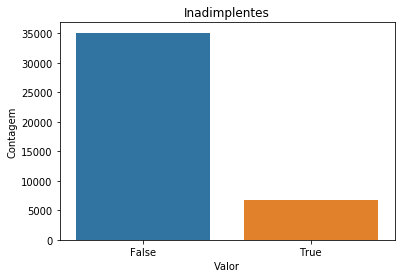

Proporção entre Inadimplentes no Dataset:
False    77.955556
True     14.802222
Name: target_default, dtype: float64


In [11]:
# Relação entre Inadimplentes no Dataset
fig, ax = plt.subplots()
sns.countplot('target_default', data=df, ax=ax)
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()

print("Proporção entre Inadimplentes no Dataset:")
print((df['target_default'].value_counts() / df.shape[0] )*100)

## Preparação dos dados

Conforme nossas informações vamos fazer algumas limpezas

In [0]:
# Vamos fazer uma cópia do nosso dataset
df_clean = df.copy()

In [13]:
df_clean.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Vamos excluir algumas colunas
`ids`, `external_data_provider_credit_checks_last_2_year`, `channel`, `profile_phone_number`

In [0]:
# excluindo as colunas
df_clean.drop(labels=['ids', 'external_data_provider_credit_checks_last_year', 'channel', 'profile_phone_number'], axis=1, inplace=True)

Vamos substituir valor 'inf' por 'NaN' na coluna 'reported_income'
`inf` por `NaN` na coluna `reported_income`

In [0]:
# Substituindo
 df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)


In [16]:
# Vamos verificar o resultado da substitução
df_clean['reported_income']

0         57849.0
1          4902.0
2        163679.0
3          1086.0
4        198618.0
           ...   
44995     73417.0
44996     26246.0
44997    101252.0
44998    129844.0
44999    112766.0
Name: reported_income, Length: 45000, dtype: float64

In [0]:
# Substituindo o valor -999 em 'external_data_provider_email_seen_before' por 'NaN'
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

In [0]:
# Eliminando as colunas sem informação aparente ou que demandam mais pesquisa

# Variável temporária para armazenar o label das colunas a serem eliminadas
drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'shipping_state', 'target_fraud']

# Comando para eliminar as colunas            
df_clean.drop(labels=drop_var, axis=1, inplace=True)

In [0]:
# Eliminar as linhas com valores nulos (NaN) para a coluna target_default
df_clean.dropna(subset=['target_default'], inplace=True)

Como não temos informações sobre todas as colunas (*features*), vamos assumir como verdade que : 


1.   Algumas não são obrigatórias (exemplo perfil no Facebook); 
2.   Por não conhecermos em detalhes o dataset, para dados que se referem às últimas ocorrências, com informação null, vamos considerar zero , exemplo `['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues']`.
3.   Para as variáveis numéricas, com valor `NaN` será adotado o valor da mediana, 
4.   Para as categóricas o valor mais frequente.

In [0]:
# substituição de valores ausentes confome item 2 de nossa análise anterior
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

In [0]:
# Importando a biblioteca para substituição dos valores conforme definido acima no item 4
from sklearn.impute import SimpleImputer

# Atribuindo os labels das colunas númericas a uma variável
num_df = df_clean.select_dtypes(exclude='object').columns

# Atribuindo os labels das colunas categórcias a uma variável
cat_df = df_clean.select_dtypes(include='object').columns


In [0]:
# substituindo as variáveis categóricas pelos valores mais frequentes conforme definido acima no item 4
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

In [0]:
# substituindo as variáveis numéricas pela mediana conforme definido acima no item 3
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])


Vamos verificar se as variáveis escolhidas não possuem mais os valores nulos iniciais.

In [24]:
# verificar a quantidade de dados nulos
df_clean.isnull().sum()

target_default                                      0
score_1                                             0
score_2                                             0
score_3                                             0
score_4                                             0
score_5                                             0
score_6                                             0
risk_rate                                           0
last_amount_borrowed                                0
last_borrowed_in_months                             0
credit_limit                                        0
income                                              0
facebook_profile                                    0
state                                               0
real_state                                          0
ok_since                                            0
n_bankruptcies                                      0
n_defaulted_loans                                   0
n_accounts                  

Para melhorar o desempenho do modelo, vamos normalizar as variáveis numéricas usando `StandardScaler`.

In [0]:
# importando a biblioteca para normalizar nossos dados
from sklearn.preprocessing import StandardScaler

In [0]:
# fazendo uma copia do nosso dataset já limpo para um novo dataset a ser normalizado
scaled_df = df_clean.copy()

In [0]:
# normalizando as colunas numéricas
num_cols = scaled_df.drop('target_default',
                         axis=1).select_dtypes(exclude='object').columns

scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

In [28]:
# verificando nossos dados normailizados
scaled_df.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,1.412589,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,-0.094349,-0.278592,-0.057693,1.604337,1.577495,1.341208,0.0,0.444809,1.322812,0.501783,-0.040691
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,-0.707920,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,1.191063,-0.278592,-0.057693,0.732520,0.937596,0.671463,0.0,-0.452701,-0.635622,-0.894101,-0.040691
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,-0.707920,Ygq6MsM98oC8yceExr69Ig==,n+xK9CfX0bCn77lClTWviw==,-0.094349,-0.278592,-0.057693,-0.139296,-1.302049,-1.652141,0.0,0.444809,-1.096430,-1.512178,-0.040691
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,-0.707920,KET/Pmr6rHp1RJ/P9ymztw==,n+xK9CfX0bCn77lClTWviw==,-0.094349,3.365634,-0.057693,1.822291,1.737469,1.081511,0.0,1.342319,0.573999,1.092082,-0.040691
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,1.412589,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,-0.094349,-0.278592,-0.057693,0.078658,-1.302049,-0.052955,0.0,0.444809,1.034807,-0.626730,-0.040691


Dando continuidade a nossa a preparação dos dados, vamos realizar o Label Encoding, que irá substituir as nossas variáveis categóricas por valores.

In [0]:
# importando a biblioteca necessária para rotular nossas ocorrencias
from sklearn.preprocessing import LabelEncoder

In [0]:
# gerando uma cópia de nosso dataset para um novo que vamos rotular (Label Encoding)
encoded_df = scaled_df.copy()

In [0]:
# extrair as colunas categóricas e colocando numa variável
cat_cols = encoded_df.select_dtypes('object').columns

In [0]:
# codificando cada coluna categórica
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

In [33]:
# verificando nossos dados
encoded_df.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded
0,False,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,1.412589,-0.094349,-0.278592,-0.057693,1.604337,1.577495,1.341208,0.0,0.444809,1.322812,0.501783,-0.040691,0,10,44,1
1,False,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,-0.707920,1.191063,-0.278592,-0.057693,0.732520,0.937596,0.671463,0.0,-0.452701,-0.635622,-0.894101,-0.040691,3,16,47,1
2,True,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,-0.707920,-0.094349,-0.278592,-0.057693,-0.139296,-1.302049,-1.652141,0.0,0.444809,-1.096430,-1.512178,-0.040691,3,9,32,3
3,False,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,-0.707920,-0.094349,3.365634,-0.057693,1.822291,1.737469,1.081511,0.0,1.342319,0.573999,1.092082,-0.040691,0,21,23,3
4,False,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,1.412589,-0.094349,-0.278592,-0.057693,0.078658,-1.302049,-0.052955,0.0,0.444809,1.034807,-0.626730,-0.040691,2,1,47,3


Por fim, vamos separar a variável alvo das demais e dividir o *dataset* entre dados de treino e teste com a função `train_test_split`.

<h1> Criando nosso modelo </h1>

In [0]:
# separando as variáveis independentes da variável alvo
# X todas as colunas sem a coluna 'target_default
# y apenas a coluna 'target_default

X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

In [35]:
# nossos dados após o split
X.head()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded
0,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,1.412589,-0.094349,-0.278592,-0.057693,1.604337,1.577495,1.341208,0.0,0.444809,1.322812,0.501783,-0.040691,0,10,44,1
1,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,-0.707920,1.191063,-0.278592,-0.057693,0.732520,0.937596,0.671463,0.0,-0.452701,-0.635622,-0.894101,-0.040691,3,16,47,1
2,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,-0.707920,-0.094349,-0.278592,-0.057693,-0.139296,-1.302049,-1.652141,0.0,0.444809,-1.096430,-1.512178,-0.040691,3,9,32,3
3,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,-0.707920,-0.094349,3.365634,-0.057693,1.822291,1.737469,1.081511,0.0,1.342319,0.573999,1.092082,-0.040691,0,21,23,3
4,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,1.412589,-0.094349,-0.278592,-0.057693,0.078658,-1.302049,-0.052955,0.0,0.444809,1.034807,-0.626730,-0.040691,2,1,47,3


## Validação Cruzada com KFold

In [0]:
# importando o modelo de seleção - KFold
from sklearn.model_selection import KFold

# importando nossas metricas
from sklearn.metrics import accuracy_score

# importando nosso modelo de machine learning - XGBoost
from xgboost import XGBClassifier

# importando nossa biblioteca de funções matemáticas
import numpy as np

In [37]:
# Verificando nossa métrica com XGBClassifier
# Com 5 repetições para cada divisão dos dados em 3 splits

resultados = []
for rep in range(5):
  print ('Repetição :',rep)
  kf = KFold(n_splits=3, shuffle=True, random_state = rep)
  
  for linhas_treino, linhas_teste in kf.split(X):
    print('Treino :', linhas_treino.shape[0])
    print('Teste :', linhas_teste.shape[0])

    X_train, X_test = X.iloc[linhas_treino], X.iloc[linhas_teste]
    y_train, y_test = y.iloc[linhas_treino], y.iloc[linhas_teste]

    ml_model = XGBClassifier(learning_rate=0.0145, n_estimators=1000, max_depth=6, subsample=1.0, colsample_bytree=1.0, gamma=1, 
                         random_state=0, n_jobs=1) # 84.84
    ml_model.fit(X_train, y_train)

    p = ml_model.predict(X_test)

    acc = np.mean(y_test == p)

    resultados.append(acc)

    print()
    print('Acurácia',acc)
    print()

Repetição : 0
Treino : 27827
Teste : 13914

Acurácia 0.8370705763978726

Treino : 27827
Teste : 13914

Acurácia 0.844832542762685

Treino : 27828
Teste : 13913

Acurácia 0.8395026234456983

Repetição : 1
Treino : 27827
Teste : 13914

Acurácia 0.842748311053615

Treino : 27827
Teste : 13914

Acurácia 0.838723587753342

Treino : 27828
Teste : 13913

Acurácia 0.8390713720980378

Repetição : 2
Treino : 27827
Teste : 13914

Acurácia 0.8422452206410809

Treino : 27827
Teste : 13914

Acurácia 0.8395860284605433

Treino : 27828
Teste : 13913

Acurácia 0.8414432545101703

Repetição : 3
Treino : 27827
Teste : 13914

Acurácia 0.8378611470461406

Treino : 27827
Teste : 13914

Acurácia 0.8418858703464137

Treino : 27828
Teste : 13913

Acurácia 0.8458995184359951

Repetição : 4
Treino : 27827
Teste : 13914

Acurácia 0.8444013224090844

Treino : 27827
Teste : 13914

Acurácia 0.8380048871640075

Treino : 27828
Teste : 13913

Acurácia 0.8424495076547114



In [38]:
# Nossa acurácia média
np.mean(resultados)


0.8410483846786264